<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

[]

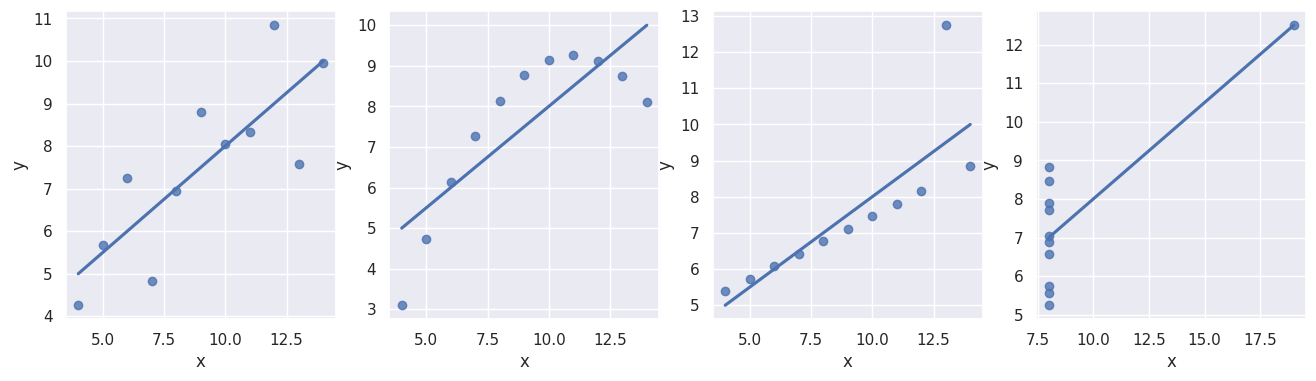

In [5]:
# Dividir los datos en cuatro conjuntos según el valor de "dataset"
ds1 = data[data['dataset'] == 'I']
ds2 = data[data['dataset'] == 'II']
ds3 = data[data['dataset'] == 'III']
ds4 = data[data['dataset'] == 'IV']

# Crear una figura con cuatro subplots
fig, axs = plt.subplots(ncols=4, figsize=(16, 4))

# Graficar cada conjunto de datos en su respectivo subplot
sns.regplot(x='x', y='y', data=ds1, ax=axs[0], ci=None)
sns.regplot(x='x', y='y', data=ds2, ax=axs[1], ci=None)
sns.regplot(x='x', y='y', data=ds3, ax=axs[2], ci=None)
sns.regplot(x='x', y='y', data=ds4, ax=axs[3], ci=None)

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
plt.plot()

Los gráficos son distintos entre sí, el primero parece tener una tendencia lineal. El segundo se puede describir mejor mediante una cuadrática. El tercero también tiene tendencia lineal al igual que el curato, pero de distinta manera.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [6]:
grupos = ['I','II','III','IV']
for grupo in grupos:
  print('Grupo',grupo+':')
  display(data[data['dataset']==grupo].describe())

Grupo I:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


Grupo II:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


Grupo III:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


Grupo IV:


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Esto nos permite observar que, a pesar de detener distinto gráfico y comportarse 'visualmente' de manera diferente, comparten la media y la desviación estándar.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

Group: I
MSE:  1.2511536363636366
R2:   0.6665424595087748 

Group: II
MSE:  1.2523900826446281
R2:   0.6662420337274844 

Group: III
MSE:  1.2505628925619836
R2:   0.6663240410665592 

Group: IV
MSE:  1.249317272727273
R2:   0.6667072568984653 



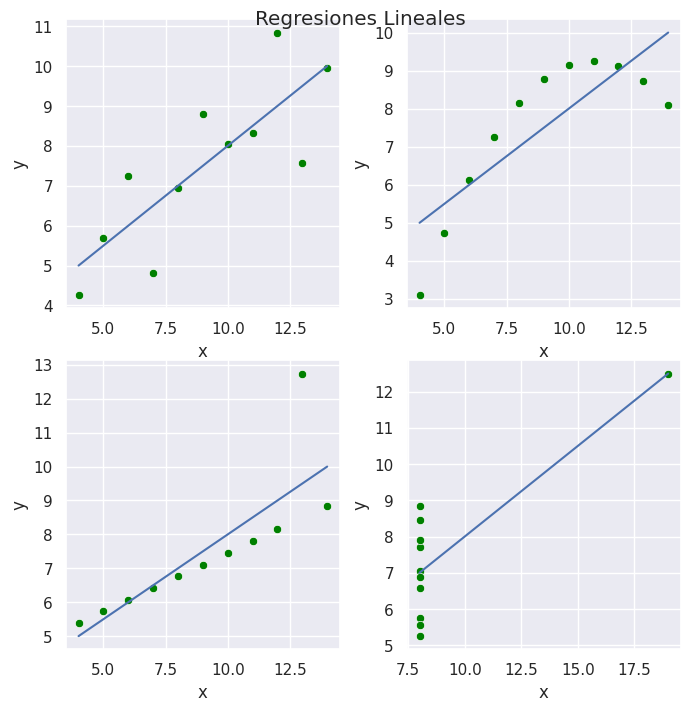

In [12]:

data_types = ['I', 'II', 'III', 'IV']
fig, axes = plt.subplots(figsize=(7,7), nrows=2, ncols=2)
fig.tight_layout()
fig.suptitle('Regresiones Lineales')

for i, t in enumerate(data_types):
    X = data[data['dataset']==t]['x'].to_numpy().reshape(-1,1)
    y = data[data['dataset']==t]['y'].to_numpy().reshape(-1,1)

    model = LinearRegression().fit(X,y)
    y_pred = model.predict(X).reshape(1,-1)[0]
    pred = pd.DataFrame({'set': t ,'x': X.reshape(1,-1)[0], 'y_pred': y_pred})
    print('Group:', t)
    print('MSE: ', mean_squared_error(y, y_pred))
    print('R2:  ', r2_score(y, y_pred), '\n')


    sns.scatterplot(data=data[data['dataset']==t], x='x', y='y', ax=axes[i//2,i%2], color='green')
    sns.lineplot(data=pred, x='x', y='y_pred', ax=axes[i//2,i%2])

4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

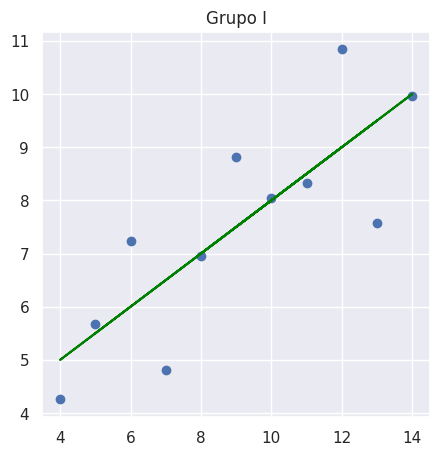

In [24]:
# Crea el gráfico
fig, axs = plt.subplots(figsize=(5,5))

# Grupo I
X1 = ds1[['x']]
y1 = ds1['y']

# Creación y ajuste de modelo
group1 = LinearRegression()
group1.fit(X1, y1)

y_hat1 = group1.predict(X1)

# Resultados
plt.scatter(X1, y1)
plt.plot(X1, y_hat1, color = 'green');
plt.title('Grupo I')

# Muestra el gráfico
plt.show()

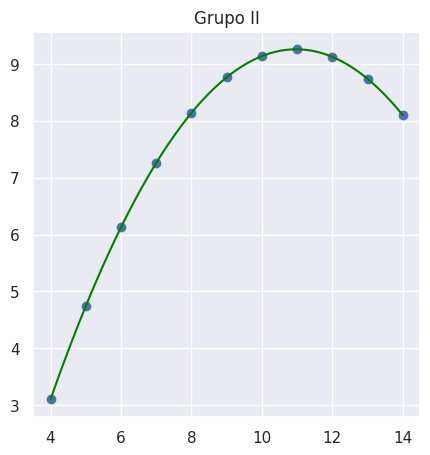

In [25]:
# Crea el gráfico
fig, axs = plt.subplots(figsize=(5,5))

# Grupo II
X2 = ds2['x']
y2 = ds2['y']

# Ajuste de modelo
coeffs = np.polyfit(X2, y2, 2)
poly = np.poly1d(coeffs)

# Resultados
plt.scatter(X2, y2)
x = np.linspace(np.min(X2), np.max(X2), 100)
plt.plot(x, poly(x), color = 'green');
plt.title('Grupo II')
plt.show()

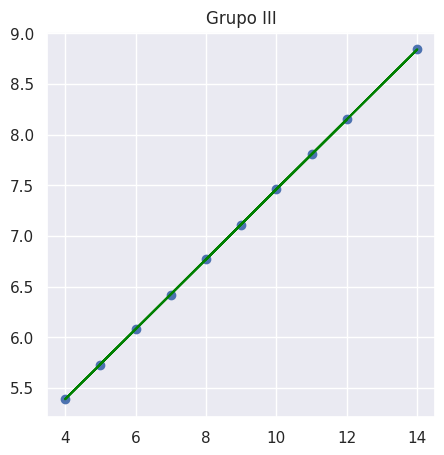

In [28]:
# Crea el gráfico
fig, axs = plt.subplots(figsize=(5,5))

# Grupo III
ds3_new = ds3[ds3['y'] < 10] # Eliminamos outlier

X3 = ds3_new[['x']]
y3 = ds3_new['y']

# Creación y ajuste del modelo
group3 = LinearRegression()
group3.fit(X3, y3)

# Predicciones:
y_hat3 = group3.predict(X3)

# Resultados
plt.scatter(X3, y3)
plt.plot(X3, y_hat3, color = 'green');
plt.title('Grupo III')
plt.show()

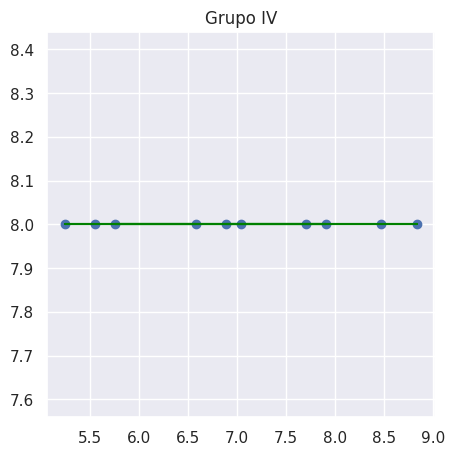

In [32]:
# Crea el gráfico
fig, axs = plt.subplots(figsize=(5,5))


# Quitar outlier
ds4_new = ds4[ds4['y'] < 10]

# Cambiar ejes
X4 = ds4_new[['y']]
y4 = ds4_new['x']

# Creación y ajuste del modelo
group4 = LinearRegression()
group4.fit(X4, y4)
y_hat4 = group4.predict(X4)

# Resultados
plt.scatter(X4, y4)
plt.plot(X4, y_hat4, color = 'green');
plt.title('Grupo IV')
plt.show()
